# Assignment 4: Pipelines and Hyperparameter Tuning (32 total marks)
### Due: November 22 at 11:59pm

### Name: 

### In this assignment, you will be putting together everything you have learned so far. You will need to find your own dataset, do all the appropriate preprocessing, test different supervised learning models and evaluate the results. More details for each step can be found below.

### You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

## Import Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Step 1: Data Input (4 marks)

Import the dataset you will be using. You can download the dataset onto your computer and read it in using pandas, or download it directly from the website. Answer the questions below about the dataset you selected. 

To find a dataset, you can use the resources listed in the notes. The dataset can be numerical, categorical, text-based or mixed. If you want help finding a particular dataset related to your interests, please email the instructor.

**You cannot use a dataset that was used for a previous assignment or in class**

In [4]:
# Import dataset (1 mark)
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
letter_recognition = fetch_ucirepo(id=59) 
  
# data (as pandas dataframes) 
X = letter_recognition.data.features 
y = letter_recognition.data.targets 
  
# metadata 
print(letter_recognition.metadata) 
  
# variable information 
print(letter_recognition.variables)

{'uci_id': 59, 'name': 'Letter Recognition', 'repository_url': 'https://archive.ics.uci.edu/dataset/59/letter+recognition', 'data_url': 'https://archive.ics.uci.edu/static/public/59/data.csv', 'abstract': 'Database of character image features; try to identify the letter', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 20000, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['lettr'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1991, 'last_updated': 'Thu Sep 28 2023', 'dataset_doi': '10.24432/C5ZP40', 'creators': ['David Slate'], 'intro_paper': None, 'additional_info': {'summary': 'The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet.  The character images were based on 20 different fonts and each letter within these 20 fonts wa

### Questions (3 marks)

1. (1 mark) What is the source of your dataset?

http://archive.ics.uci.edu/dataset/59/letter+recognition

1. (1 mark) Why did you pick this particular dataset?

I think it is an interesting image classification problem to be able classify the english alpbabet.

1. (1 mark) Was there anything challenging about finding a dataset that you wanted to use? 

No, I think that there are a wide selection of datasets available for regression and classification tasks

## Step 2: Data Processing (5 marks)

The next step is to process your data. Implement the following steps as needed.

In [5]:
print(X.shape)
X.head()

(20000, 16)


,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [6]:
print(y.shape)
print(y.dtypes)
y.head()


(20000, 1)
lettr    object
dtype: object


,lettr
0,T
1,I
2,D
3,N
4,G


In [7]:
# Clean data (if needed)
# No cleaning required 
print(X.dtypes) 

x-box    int64
y-box    int64
width    int64
high     int64
onpix    int64
x-bar    int64
y-bar    int64
x2bar    int64
y2bar    int64
xybar    int64
x2ybr    int64
xy2br    int64
x-ege    int64
xegvy    int64
y-ege    int64
yegvx    int64
dtype: object


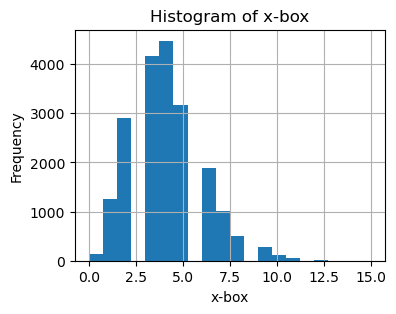

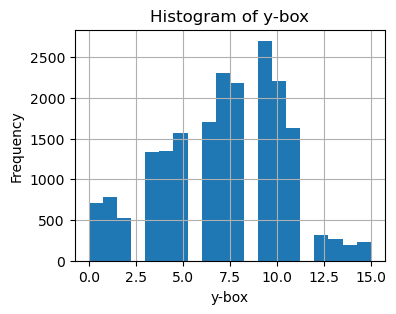

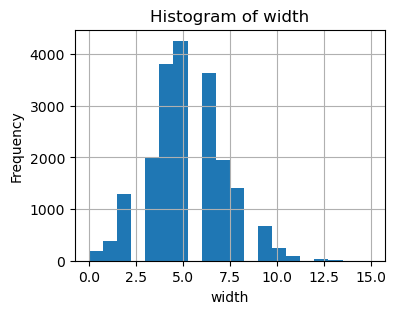

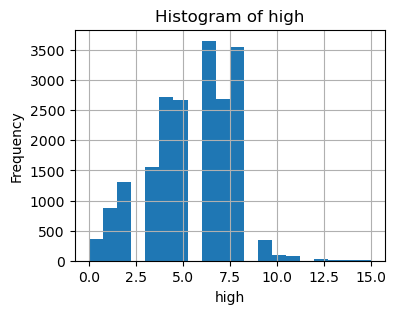

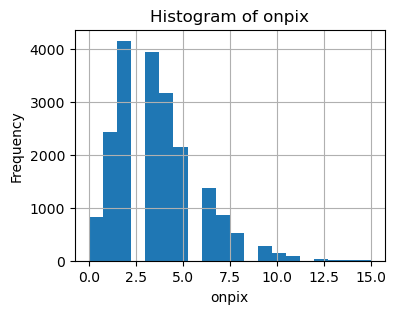

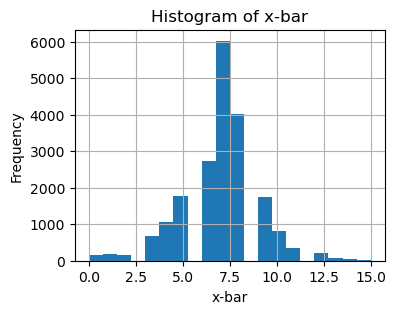

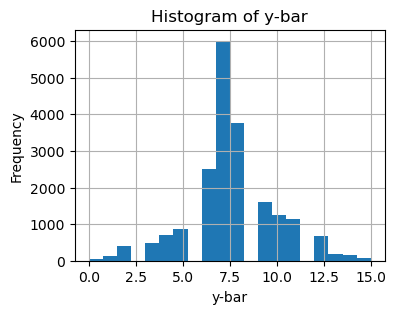

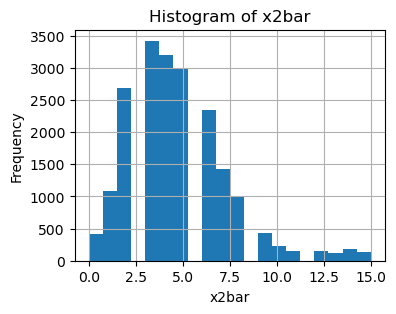

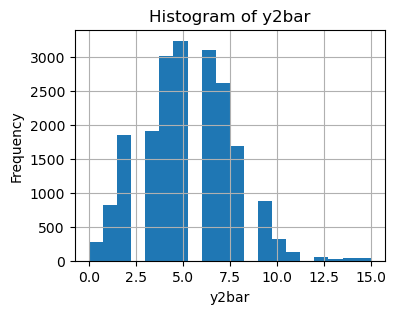

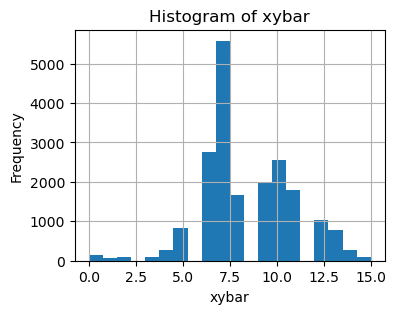

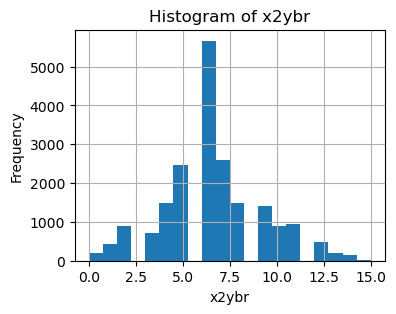

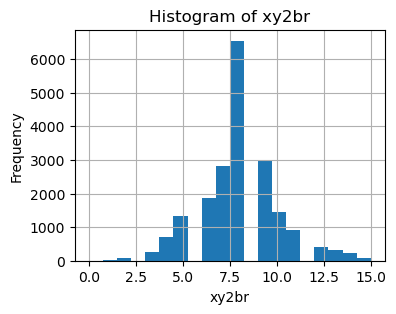

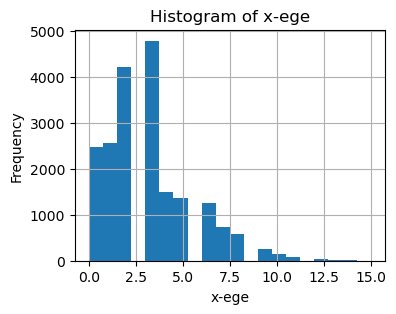

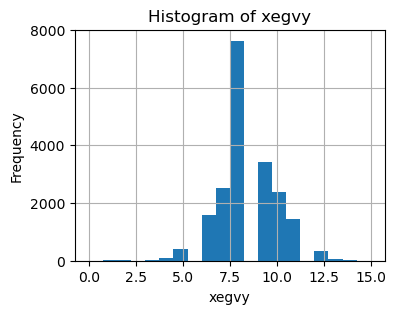

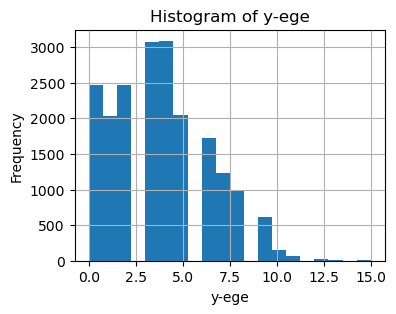

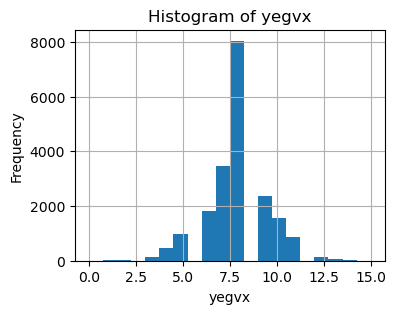

In [8]:
# Lets see distribution of each feature. If it follows as gaussian 
# distribution we can use a StandardScaler

i = 0
for column in X.columns:
    # Plot histogram for each feature
    plt.figure(figsize=(4,3))
    X[column].hist(bins=20)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Display the plot
    plt.show()


In [33]:
# Implement preprocessing steps. Remember to use ColumnTransformer if more than one preprocessing method is needed

# encoding target 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_enc = encoder.fit_transform(y)

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, random_state=0)

/home/musabedin/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Questions (2 marks)

1. (1 mark) Were there any missing/null values in your dataset? If yes, how did you replace them and why? If no, describe how you would've replaced them and why.

My dataset did not have any missing or null values. If I did have missing/null values, it would depend on what the feature represented. If I was missing data at random, I would fill it with the mean but if the absense of a value meant that it was equal to 0, I would fill it zero. I would drop the column if I have many null values.

2. (1 mark) What type of data do you have? What preprocessing methods would you have to apply based on your data types?

My target variable is a of an object with 26 distinct values. My features are all integers and as shown by the histogram, they are in a range of 0-15. I have applied Label Encoder to my target variable and I will apply a scaler in the pipeline for my features. Because it looks like most of my features follow a normal distribution, I will apply the standard scaler



## Step 3: Implement Machine Learning Model (11 marks)

In this section, you will implement three different supervised learning models (one linear and two non-linear) of your choice. You will use a pipeline to help you decide which model and hyperparameters work best. It is up to you to select what models to use and what hyperparameters to test. You can use the class examples for guidance. You must print out the best model parameters and results after the grid search.

In [34]:
# Implement pipeline and grid search here. Can add more code blocks if necessary

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#pipelines
pipeline_lr = Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression(max_iter=1000))])
pipeline_rf = Pipeline([('clf', RandomForestClassifier(random_state=42))])
pipeline_svm = Pipeline([('scaler', StandardScaler()), ('clf', SVC())])



In [35]:
# parameter grid
param_grid_lr = {'clf__C': [0.1, 1, 10]}
param_grid_rf = {'clf__n_estimators': [100, 200, 300], 'clf__max_depth': [5, 10, 15]}
param_grid_svm = {'clf__C': [0.1, 1, 10], 'clf__gamma': [0.001, 0.01]}

In [36]:
# Grid search

gs_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5)
gs_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5)
gs_svm = GridSearchCV(pipeline_svm, param_grid_svm, cv=5)

gs_lr.fit(X_train, y_train)
gs_rf.fit(X_train, y_train)
gs_svm.fit(X_train, y_train)

bp_lr = gs_lr.best_params_
bp_rf = gs_rf.best_params_
bp_svm = gs_svm.best_params_

results_lr = gs_lr.cv_results_
results_rf = gs_rf.cv_results_
results_svm = gs_svm.cv_results_

In [39]:
print("\nLogistic Regression Results:")
print("Highest Accuracy scores:", max(results_lr['mean_test_score']))
print("Best Parameters for Logistic Regression:", bp_lr)

print("\nRandom Forest Results:")
print("Highest Accuracy scores:", max(results_rf['mean_test_score']))
print("Best Parameters for Random Forest:", bp_rf)

print("\nSVM Results:")
print("Highest Accuracy scores:", max(results_svm['mean_test_score']))
print("Best Parameters for SVM:", bp_svm)


Logistic Regression Results:
Highest Accuracy scores: 0.7676666666666667
Best Parameters for Logistic Regression: {'clf__C': 10}

Random Forest Results:
Highest Accuracy scores: 0.9425333333333332
Best Parameters for Random Forest: {'clf__max_depth': 15, 'clf__n_estimators': 300}

SVM Results:
Highest Accuracy scores: 0.9113999999999999
Best Parameters for SVM: {'clf__C': 10, 'clf__gamma': 0.01}


### Questions (5 marks)

1. (1 mark) Do you need regression or classification models for your dataset?

I used classification models for my dataset since the target variable is 26 discrete classes.

1. (2 marks) Which models did you select for testing and why?

I selected Logistic Regression as my linear model and Random Forest and SVM as my non linear models. On the webpage for the dataset, they have a list of best performing models for this dataset and random forest and SVM were two fthe best three performing models. Logistic Regression was the best linear model. 

1. (2 marks) Which model worked the best? Does this make sense based on the theory discussed in the course and the context of your dataset?

Based on the highest accuracy score of 94% accuracy for Random Forest, it is the best performing model with 15 levels deep and 300 trees. This makes sense as to why it would perform better than SVM and Logistic Regression because it is typically more robust to overfitting and is able to handle non linear relationships between the feature and the target. Unlike SVM, we didn't have to scale this model either to get a good score.

## Step 4: Validate Model (6 marks)

Use the testing set to calculate the testing accuracy for the best model determined in Step 3.

In [40]:
from sklearn.metrics import accuracy_score

best_model = gs_rf.best_estimator_ 
best_model.fit(X_train, y_train)
pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(f"Validation Accuracy of Random Forest Model: {accuracy}")


Validation Accuracy of Random Forest Model: 0.9574



### Questions (5 marks)

1. (1 mark) Which accuracy metric did you choose? 

I used accuracy_score from sklearn.metrics. It is simply a result of it the model guessed the class correctly over all of its guesses.

1. (1 mark) How do these results compare to those in part 3? Did this model generalize well?

The model accuracy of the validation set was 0.95. The validation accuracy is higher than the training accuracy indicating that perhaps the random forest classifer was underfitting.

1. (3 marks) Based on your results and the context of your dataset, did the best model perform "well enough" to be used out in the real-world? Why or why not? Do you have any suggestions for how you could improve this analysis?

I think a 95% accuracy for predicting the letter based is very good. For a sentence, it should be accurate enough for a person to understand the sentiment or most of the words if there was a program that converted the image to words. 5 characters that were mis labelled out of 100 characters is enough to understand the text. 